# IT8302 Applied Machine Learning - CA2 Submission - Unsupervised Machine Learning
### Submitted By: Lo Ka Fai
### Student ID: 7304896V
### Submission Date: 16 Feb 2025

# PART A: Unsupervised Learning (Clustering)
## Objective: 
## In this segment, 3 clustering algorithms, K-Means/DBSCAN/Hierarchical, in Scikit-Learn will be examined and eventually attempt to identify the best clustering model for the given wine dataset. 

## Wine Dataset : https://archive.ics.uci.edu/ml/datasets/wine
## About the wine dataset - These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

## 1. Import Libraries

In [7]:
# Install ucimlrepo package from Python library that provides an interface to access datasets from UCI Machine Learning Repository. I
!pip install ucimlrepo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors  # For DBSCAN k-distance plot
from sklearn.cluster import AgglomerativeClustering  # Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  # Hierarchical clustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo # import fetch_ucirepo to retrieve datasets from UCI Machine Learning Repository.
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.simplefilter("ignore", UserWarning)


## 2. Import Dataset and Exploratory Data Analysis

In [2]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# X and y are Pandas DataFrames when using the ucimlrepo package. And we are only interested in X, the features dataset in this assignment.
X = wine.data.features 
y = wine.data.targets 
  
# metadata (print out the descriptive information about the dataset)
print(wine.metadata) 


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [3]:
# To make the printout more readable
for key, value in wine.metadata.items():
    print(f"{key}: {value}\n")


uci_id: 109

name: Wine

repository_url: https://archive.ics.uci.edu/dataset/109/wine

data_url: https://archive.ics.uci.edu/static/public/109/data.csv

abstract: Using chemical analysis to determine the origin of wines

area: Physics and Chemistry

tasks: ['Classification']

characteristics: ['Tabular']

num_instances: 178

num_features: 13

feature_types: ['Integer', 'Real']

demographics: []

target_col: ['class']

index_col: None

has_missing_values: no

missing_values_symbol: None

year_of_dataset_creation: 1992

last_updated: Mon Aug 28 2023

dataset_doi: 10.24432/C5PC7J

creators: ['Stefan Aeberhard', 'M. Forina']

intro_paper: {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce

In [4]:
# Print out variable information 
print(wine.variables) 

                            name     role         type demographic  \
0                          class   Target  Categorical        None   
1                        Alcohol  Feature   Continuous        None   
2                      Malicacid  Feature   Continuous        None   
3                            Ash  Feature   Continuous        None   
4              Alcalinity_of_ash  Feature   Continuous        None   
5                      Magnesium  Feature      Integer        None   
6                  Total_phenols  Feature   Continuous        None   
7                     Flavanoids  Feature   Continuous        None   
8           Nonflavanoid_phenols  Feature   Continuous        None   
9                Proanthocyanins  Feature   Continuous        None   
10               Color_intensity  Feature   Continuous        None   
11                           Hue  Feature   Continuous        None   
12  0D280_0D315_of_diluted_wines  Feature   Continuous        None   
13                  

### 2.1 Check on X dataset (wine.data.features)

### Create function "eda" to automate EDA checks

In [3]:
def eda(df):
    """
    Perform Exploratory Data Analysis (EDA) on the given DataFrame.
    """
    print("\n*** First 5 Rows ***")
    display(df.head())
    
    print("\n*** Shape of Dataset ***")
    print(df.shape)
    
    print("\n*** Info ***")
    print(df.info())
    
    print("\n*** Statistical Summary ***")
    display(df.describe())
    
    print("\n*** Histograms ***")
    df.hist(figsize=(12,10), bins=30, edgecolor='k')
    plt.tight_layout()
    plt.show()
    
    print("\n*** Correlation Heatmap ***")
    plt.figure(figsize=(12,7))
    sns.heatmap(df.select_dtypes(include='number').corr(), cmap="YlGnBu", annot=True, fmt='.2f', linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()



*** First 5 Rows ***


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



*** Shape of Dataset ***
(178, 13)

*** Info ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline       

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



*** Histograms ***


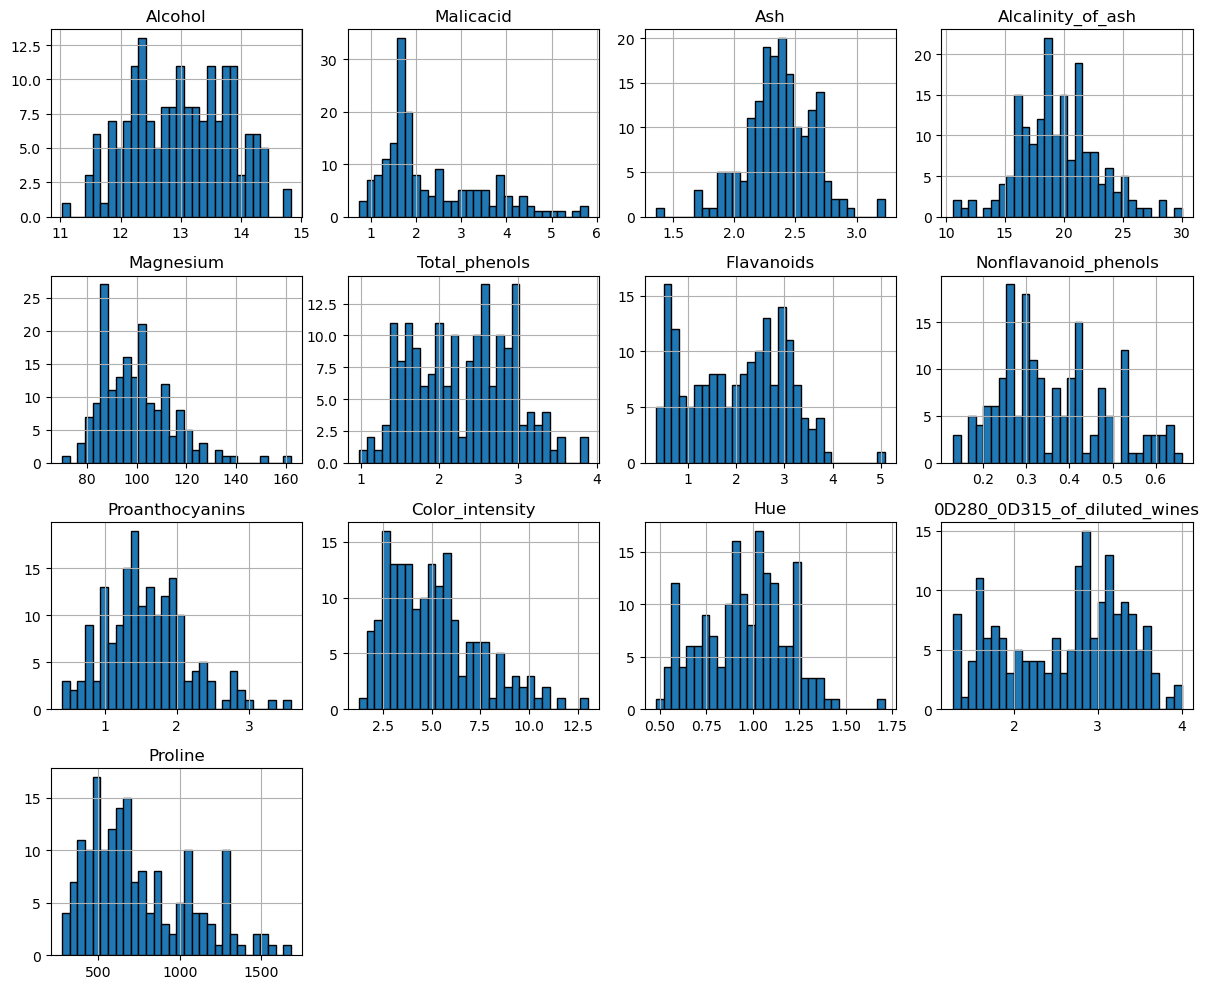


*** Correlation Heatmap ***


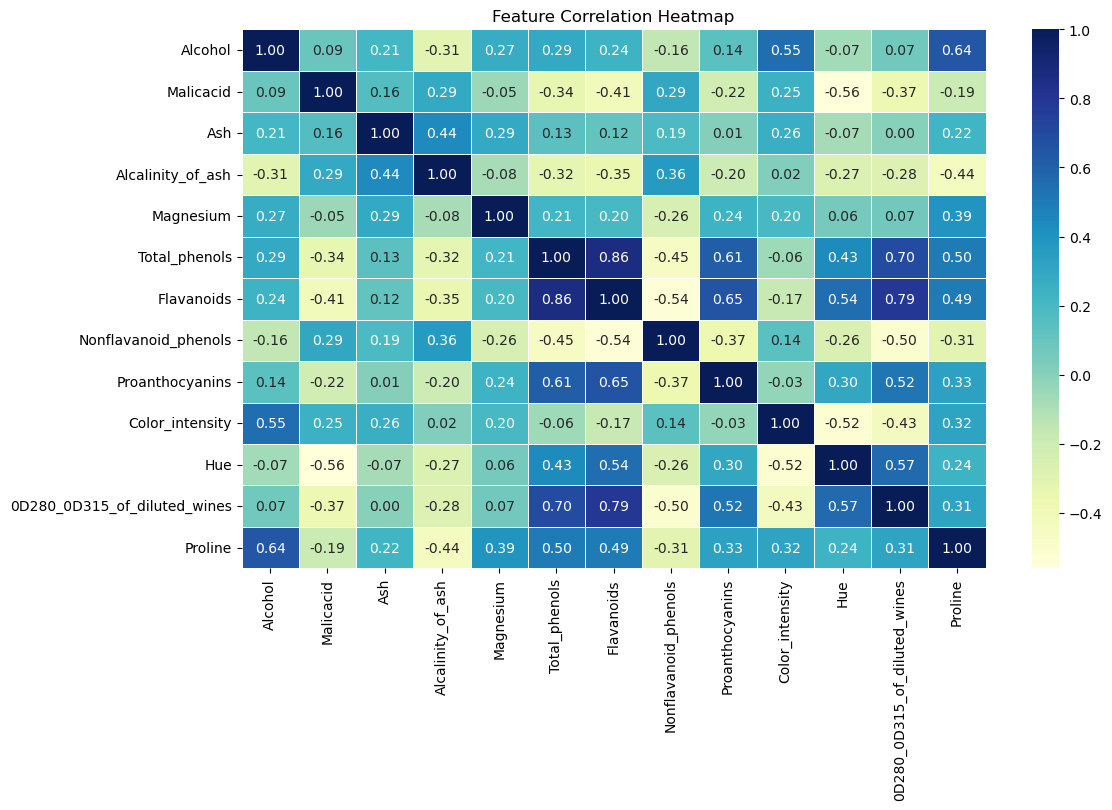

In [4]:
eda(X)

### Note:
### -No missing data.
### -The range of the values in each of the 13 feature variables are rather wide, we need to perform standardization (data scaling) later. 

## 3. K-Means Clustering

### 3.1 Preprocess the data

### 3.1.1 Standardization
### Standardization ensures all features have equal importance in clustering, avoids scale-dominated clusters, and improves clustering accuracy.

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# convert scaled data into pd dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [7]:
# Quick inspect the top 5 rows of scaled X
X_scaled_df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [8]:
# Check the statistical summary of scaled X
X_scaled_df.describe().map(lambda x: f"{x:.8f}")

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000,178.00000000
mean,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000
std,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088,1.00282088
min,-2.43423535,-1.43298305,-3.67916223,-2.67101814,-2.08825520,-2.10724602,-1.69597053,-1.86823402,-2.06903418,-1.63428828,-2.09473241,-1.89505389,-1.49318765
25%,-0.78824478,-0.65874859,-0.57212246,-0.68913719,-0.82441507,-0.88546822,-0.82753931,-0.74014117,-0.59728351,-0.79510251,-0.76756244,-0.95224831,-0.78463779
50%,0.06099988,-0.42311201,-0.02382132,0.00151829,-0.12228166,0.09595986,0.10614974,-0.17609475,-0.06289785,-0.15922463,0.03312687,0.23773476,-0.23372037
75%,0.83612865,0.66979287,0.69810851,0.60208828,0.50963841,0.80899739,0.84908511,0.60954134,0.62917538,0.49395604,0.71316437,0.78858745,0.75824943
max,2.25977152,3.10919247,3.15632527,3.15451071,4.37137214,2.53951547,3.06283174,2.40240319,3.48507251,3.43543192,3.30169422,1.96091499,2.97147258


### After data scaling, it transforms each feature to have mean 0 and standard dev 1, min/max values are rescaled to the similar range.

### 3.2 Determine the Optimal Number of Clusters (K)

### 3.2.1 Use Elbow Method to find the best K

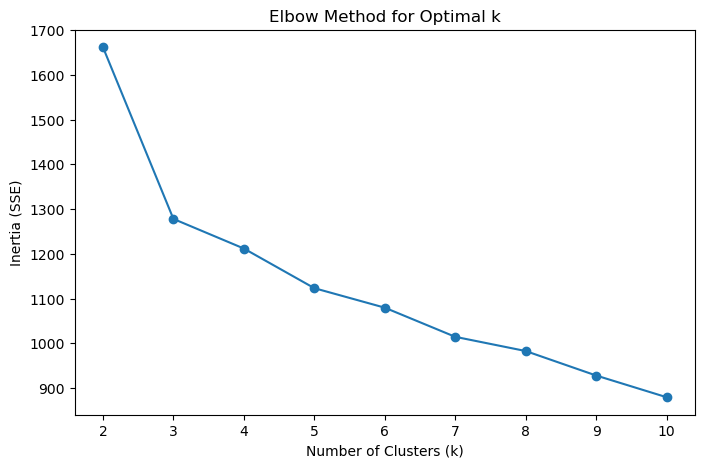

In [9]:
# Determine the optimal number of clusters using Elbow method
inertia = []  # Stores SSE for the elbow method
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

### From above by visual check, the best K is 3 by using Elbow method.

### 3.2.2 Use Silhouette Score to validate the best K

For k=2, Silhouette Score = 0.265
For k=3, Silhouette Score = 0.285
For k=4, Silhouette Score = 0.254
For k=5, Silhouette Score = 0.184
For k=6, Silhouette Score = 0.169
For k=7, Silhouette Score = 0.173
For k=8, Silhouette Score = 0.163
For k=9, Silhouette Score = 0.174
For k=10, Silhouette Score = 0.140


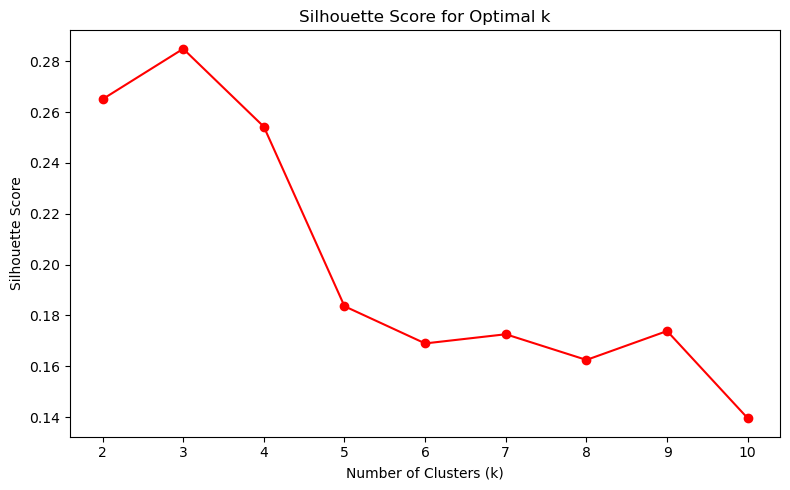

In [10]:
# Determine the optimal number of clusters using Silhouette Score
sil_scores = []  # Stores silhouette scores
K_range = range(2, 11)

# Loop through k values and calculate silhouette score
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels, metric='euclidean')
    sil_scores.append(score)  # Append the score for this k
    print(f'For k={k}, Silhouette Score = {score:.3f}')

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o', color='red')  # Plot the list of scores
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.tight_layout()
plt.show()


### From above, best K is 3 as it has the highest silhouette score 0.285, which is also reconfirm the same results from Elbow method.

### 3.3 Dimensionality Reduction - PCA (Principal Component Analysis)

### PCA reduces dimensionality while retaining most variance, making clustering more efficient and reducing noise. And is suitable for 2D visualization using scatter plot.

### Scan the best number of Principal Component (PC) for visualization with the best K=3 

In [12]:
# Try different PCA components
for n in range(2, 11):  # Test n_components from 2 to 10
    pca = PCA(n_components=n)
    X_scaled_pca = pca.fit_transform(X_scaled)

    kmeans = KMeans(n_clusters=3, n_init="auto", random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled_pca)

    sil_score = silhouette_score(X_scaled_pca, cluster_labels, metric='euclidean')
    explained_variance = np.sum(pca.explained_variance_ratio_)

    print(f"n_components={n}, Variance Retained={explained_variance:.2%}, Silhouette Score={sil_score:.4f}")

n_components=2, Variance Retained=55.41%, Silhouette Score=0.5602
n_components=3, Variance Retained=66.53%, Silhouette Score=0.4538
n_components=4, Variance Retained=73.60%, Silhouette Score=0.4051
n_components=5, Variance Retained=80.16%, Silhouette Score=0.3691
n_components=6, Variance Retained=85.10%, Silhouette Score=0.3463
n_components=7, Variance Retained=89.34%, Silhouette Score=0.3276
n_components=8, Variance Retained=92.02%, Silhouette Score=0.3150
n_components=9, Variance Retained=94.24%, Silhouette Score=0.3058
n_components=10, Variance Retained=96.17%, Silhouette Score=0.2987


### Results: If 10 PCs is used, 96% of the variance in the data can be retained.

### We can use Feature Explained Ratio in Bar chart to determine how much variance can be retained in the first 2 PC combined for 2D scatter plot visualization

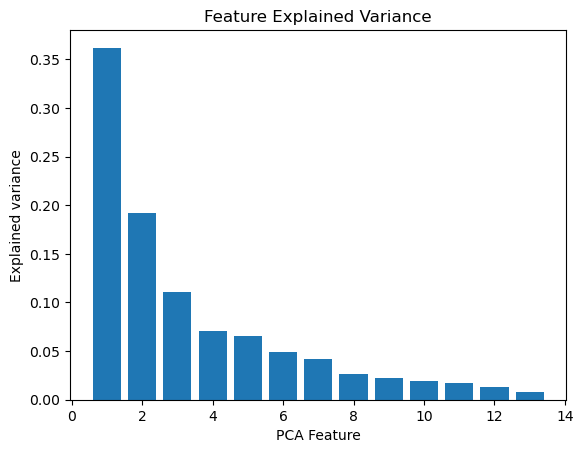

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


In [15]:
# Use all 13 feature variables
pca = PCA(n_components=13)
pca.fit(X_scaled) 

# Bar plot of explained_variance_ratio_
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

print(np.cumsum(pca.explained_variance_ratio_)) 

### Results:
### The first two PCs do not capture most of the information (only 55%) from the original dataset, implying some important patterns may be missing. 
### Ideally, the first 2 PCs shall retain 90% or above for 2D visualization. 

### We can also use Cumulative Explained Variance to find the optimal Principal Components (elbow method)

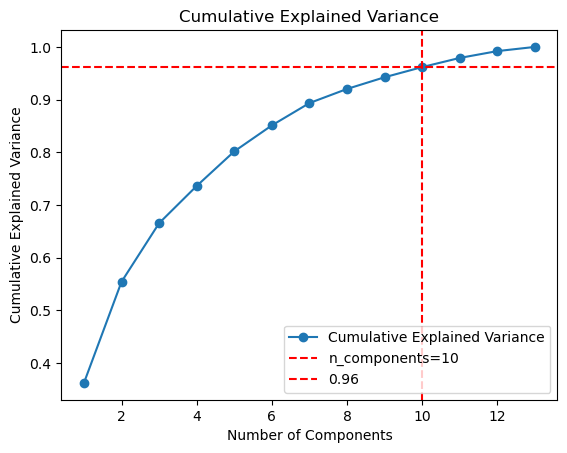

In [16]:
# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, label='Cumulative Explained Variance', marker='o')

# Draw a vertical red dotted line at n_clusters = 10
plt.axvline(x=10, color='r', linestyle='--', label='n_components=10')

# Draw a horizontal red dotted line at the cumulative variance value corresponding to n_components=10
plt.axhline(y=cumulative_variance[9], color='r', linestyle='--', label=f'{cumulative_variance[9]:.2f}')  # Index 9 corresponds to the 10th component

# Add legend, labels, and title
plt.legend(loc='lower right')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.show()

### Ideally, we shall use 10 PCs for visualization as it retains 96% of the variance in the data. However, since we only use 2D scatter plot for visualization, first 2 PCs will be used. 

### 3.4 Visualization

### 3.4.1 We check which PC pairs provide the best clustering. 

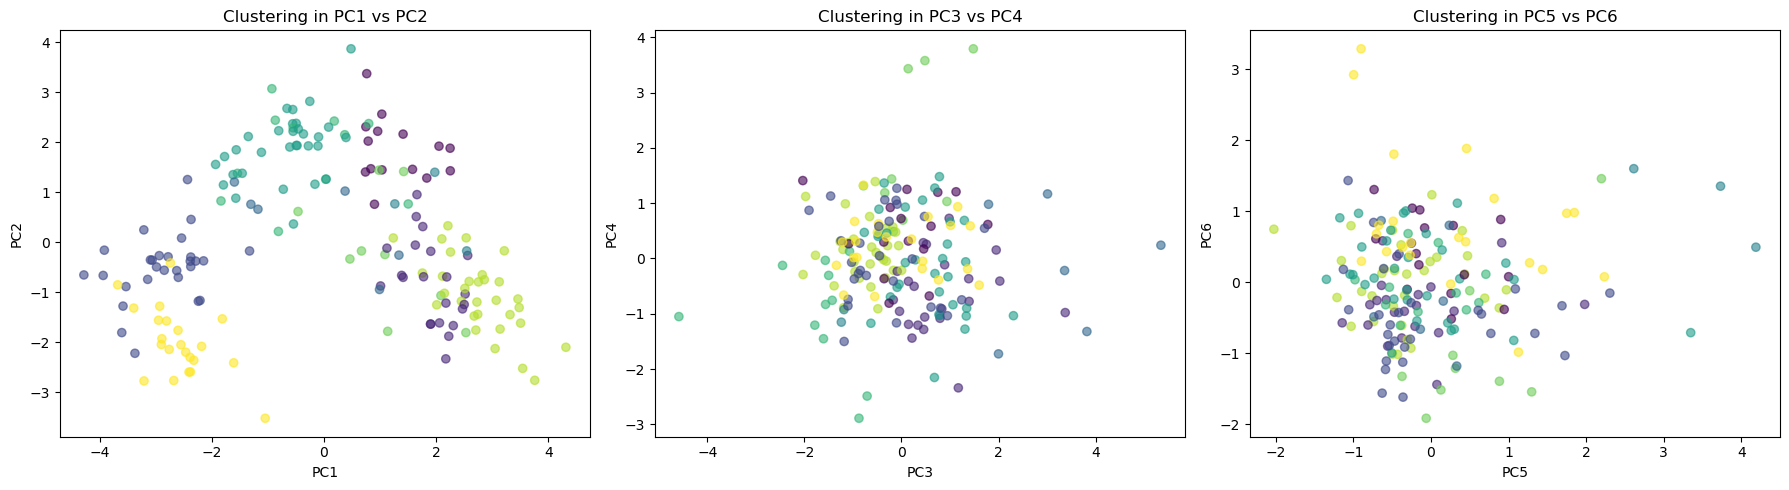

In [17]:
# Apply PCA to get transformed data
pca = PCA(n_components=6)  
X_pca = pca.fit_transform(X_scaled) 

# Define subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Try different PC pairs
pc_pairs = [(0, 1), (2, 3), (4, 5)]  

for i, (pc_x, pc_y) in enumerate(pc_pairs):
    axes[i].scatter(X_pca[:, pc_x], X_pca[:, pc_y], c=labels, cmap='viridis', alpha=0.6)
    axes[i].set_xlabel(f"PC{pc_x+1}")
    axes[i].set_ylabel(f"PC{pc_y+1}")
    axes[i].set_title(f"Clustering in PC{pc_x+1} vs PC{pc_y+1}")

plt.tight_layout()
plt.show()


### Results:
### From the above results, PC1+PC2 has the best clustering effect. We will use PC1+PC2 for the final scatter plot.

### 3.4.2 We take a look how different K value affect the clustering performance

### Scatter plot with PCA=10, PC=1,2, K=2,3,4, Scaled data

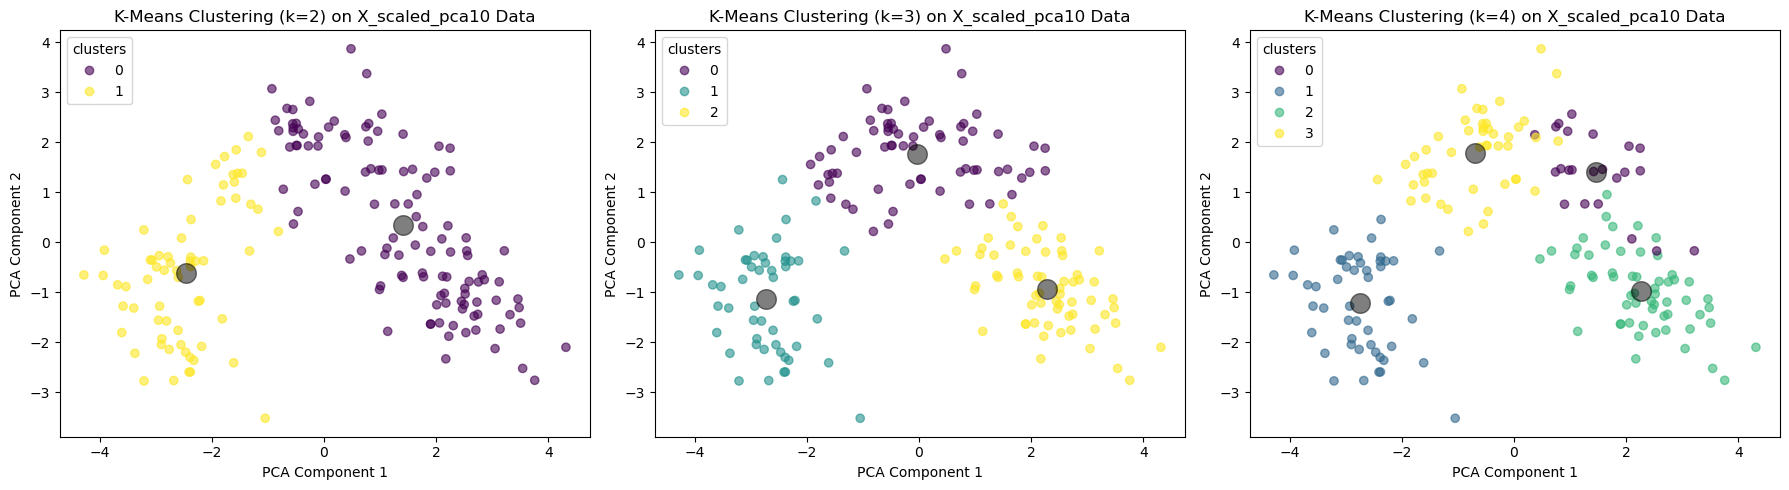

In [18]:
# Use PC=10 (96% variance in data)

pca = PCA(n_components=10)
X_scaled_pca = pca.fit_transform(X_scaled) 

# Clustering for k = 2, 3, 4
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate([2, 3, 4]):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled_pca)
    
    # Scatter plot
    sc = axes[i].scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    
    # Plot centroids (transform original centroids using PCA)
    centroids = kmeans.cluster_centers_
    axes[i].scatter(centroids[:, 0], centroids[:, 1], c='black', alpha=0.5, s=200)

    axes[i].set_title(f"K-Means Clustering (k={k}) on X_scaled_pca10 Data")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")
    axes[i].legend()
    axes[i].legend(*sc.legend_elements(), title='clusters', loc="upper left", frameon=True)
    
plt.tight_layout()
plt.show()

### All the clustering performance using different K value are clear but observed some overlapping data points in plot with K=4

### 3.4.3 Final scatter plot using the best parameters for the K-Means Clustering: 
### PCA=10, PC=0,1, K=3, Scaled data

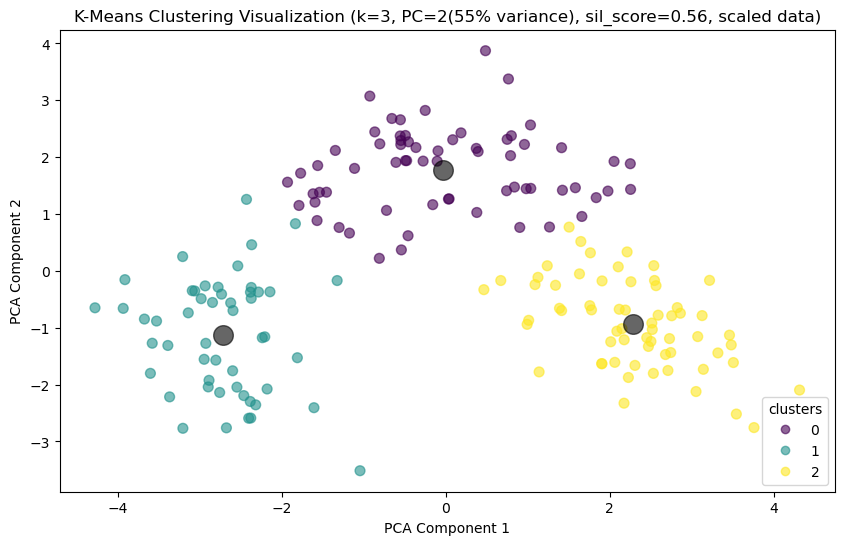

In [41]:
# The final and best balanced parameters used for the best KMeans Clustering performance
# Scaled data, PCA=10, Sil_score = 0.56, K=3 

pca = PCA(n_components=10)
X_scaled_pca = pca.fit_transform(X_scaled) 

kmeans = KMeans(n_clusters=3, n_init="auto", random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled_pca)

# Scatter plot using first 2 PCA components
plt.figure(figsize=(10, 6))
sc = plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', alpha=0.6, s=200)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization (k=3, PC=2(55% variance), sil_score=0.56, scaled data)")
plt.legend(*sc.legend_elements(), title='clusters', loc="lower right", frameon=True)

plt.show()

### As the wine dataset comes from 3 different cultivars with three types of wines. K-Means Clustering algorithm is able to classify and group them into 3 clusters nicely. 

### 3.5 Evalute the clustering quality of K-Means (PC=2, K=3)

In [44]:
pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, n_init="auto", random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled_pca)

sil_score = silhouette_score(X_scaled_pca, cluster_labels, metric='euclidean')
explained_variance = np.sum(pca.explained_variance_ratio_)

print(f"Silhouette Score={sil_score:.4f}")

Silhouette Score=0.5602


### A score of 0.56 suggests that:
### -Moderate clustering quality
### -The clusters are reasonably well-separated but may still have some overlap
### -Typically, a score between 0.5 and 0.7 indicates decent clustering, but not perfect

### 3.6 PCA Loadings 
### Use PCA Loadings to analyze the features that explain the most variance in the first Principal Component (PC1), which generally explains the most variance in the data.

In [20]:
# Apply PCA (n_components=10 to retain 96% variance)
pca = PCA(n_components=10)
X_scaled_pca = pca.fit_transform(X_scaled)

# Extract PCA Loadings
loadings = pca.components_.T  # Transpose to match features with PCs
feature_names = X.columns  # Use original feature names

# Create Loadings DataFrame (only PC1)
loadings_df = pd.DataFrame(loadings[:, :1], index=feature_names, columns=['PC1'])

# Sort features based on absolute values in PC1 (descending order)
loadings_df = loadings_df.reindex(loadings_df['PC1'].abs().sort_values(ascending=False).index)

# Print the Loadings DataFrame
print("PCA Loadings for PC1:")
print(loadings_df)


PCA Loadings for PC1:
                                   PC1
Flavanoids                    0.422934
Total_phenols                 0.394661
0D280_0D315_of_diluted_wines  0.376167
Proanthocyanins               0.313429
Nonflavanoid_phenols         -0.298533
Hue                           0.296715
Proline                       0.286752
Malicacid                    -0.245188
Alcalinity_of_ash            -0.239320
Alcohol                       0.144329
Magnesium                     0.141992
Color_intensity              -0.088617
Ash                          -0.002051


### Top 4 strongest positive influential features on PC1: Flavanoids, Total_phenols, 0D280_0D315_of_diluted_wines, Proanthocyanins. PC1 likely represents polyphenol content and antioxidant properties in the wine dataset.
### The fifth "Nonflavanoid_phenols" is the strongest negative influential feature on PC1. 
### Since Flavanoids, Total Phenols, and OD280/OD315 Absorbance are well-known indicators of polyphenol concentration and wine quality, and they have the strongest positive influence on PC1, we can infer that PC1 represents the overall polyphenol and antioxidant properties of the wine.


## 4. DBSCAN Clustering

## DBSCAN is a density-based clustering algorithm that groups together points that are closely packed while marking points in low-density regions as noise (outliers). Unlike K-Means, DBSCAN does not require specifying the number of clusters beforehand and able to determine the number of clusters automatically.

### 4.1 Use elbow method to determine optimal eps

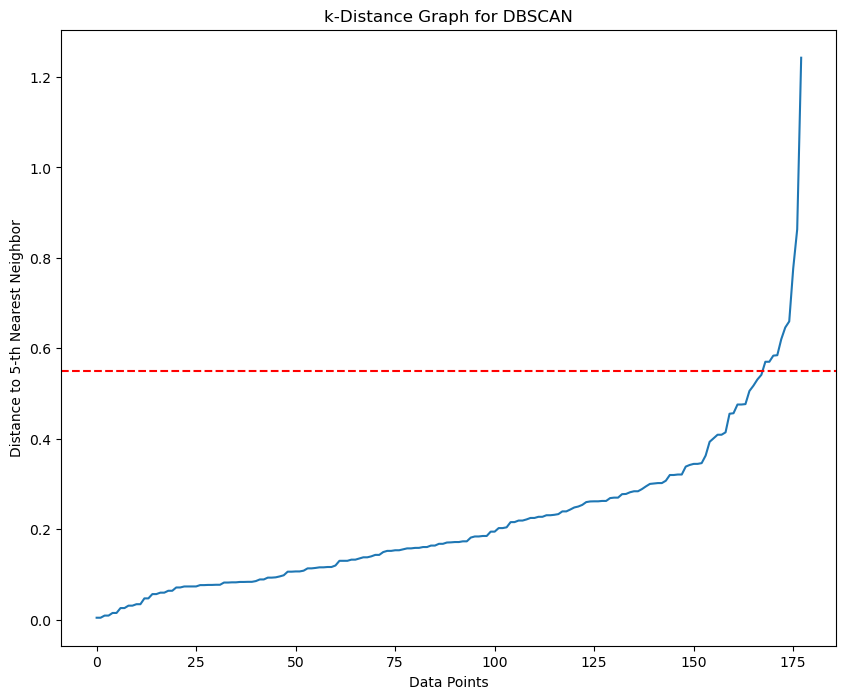

In [24]:
from sklearn.neighbors import NearestNeighbors

# Apply PCA (n_components=2 to retain 55% variance)
pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

# Calculate the k-distance for DBSCAN
min_samples = 5
nn = NearestNeighbors(n_neighbors=min_samples).fit(X_scaled_pca)
distances, indices = nn.kneighbors(X_scaled_pca)

# Sort distances for k-distance plot
distances = np.sort(distances, axis=0)
distances = distances[:,1] 

# Plot k-distance graph (elbow method)
plt.figure(figsize=(10,8))
plt.plot(distances)
plt.axhline(y=0.55, color='r', linestyle='--')
plt.xlabel("Data Points")
plt.ylabel(f"Distance to {min_samples}-th Nearest Neighbor")
plt.title("k-Distance Graph for DBSCAN")

plt.show()

### Results: After some testing and adjustment, we obtian the optimal eps = 0.55 and min_samples = 5 

### 4.2 Visualization

### Apply optimal eps and min_samples to DBSCAN and create scatter plot

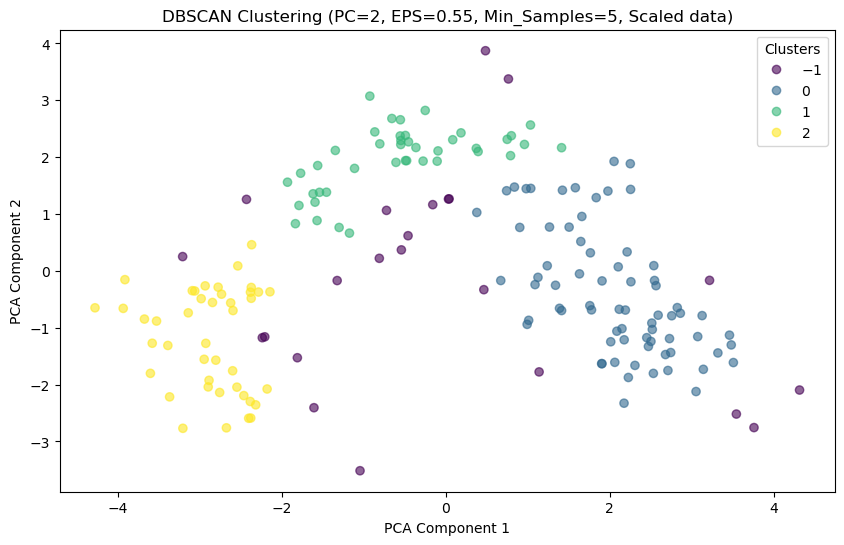

In [29]:
# Apply PCA (n_components=2)
pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.55, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled_pca)

# Create scatter plot
plt.figure(figsize=(10, 6))
sc = plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=cluster_labels_dbscan, cmap='viridis', alpha=0.6)

# Add legend with automatic cluster colors
plt.legend(*sc.legend_elements(), title="Clusters", loc="upper right", frameon=True)

# Labels and title
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (PC=2, EPS=0.55, Min_Samples=5, Scaled data)")

plt.show()


### Results:
### We obtain 4 clusters, the one marked as "-1" belong to the outliers cluster.
### DBSCAN marks noise points as -1 (i.e., outliers that do not belong to any cluster). Those points do not satisfy condition with eps=0.55 and min_samples = 5 will be taken as noise or outliers.
### DBSCAN is able to predict 3 distinct clusters and the clustering boundary looks similar to K-Means clustering. 

### 4.3 Evalute the clustering quality of DBSCAN

In [40]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.55, min_samples=5) 
labels = dbscan.fit_predict(X_pca)

# Compute Silhouette Score (Ignoring Noise Points)
mask = labels != -1  # Exclude noise points (-1)
if np.unique(labels[mask]).size > 1: 
    silhouette_avg = silhouette_score(X_pca[mask], labels[mask])
    print(f"Silhouette Score (excluding noise): {silhouette_avg:.4f}")
else:
    print("Silhouette Score cannot be calculated (only 1 cluster found)")

Silhouette Score (excluding noise): 0.5699


### The score of 0.57 suggests that: 
### -Clusters are reasonably well-separated
### -Better-defined structure
### -Some noise/outliers exist but do not significantly impact cluster quality
### -Not a perfect clustering, meaning slight overlap between clusters

## 5. Hierarchical Clustering 

### Hierarchical partitions can be visualized using a tree-liked structure (a dendrogram). It does not require to pre-define the number of clusters and the partitions can be viewed at different levels of granularities using different K.


### 5.1 Visualization by Dendrogram

### Since the wine data is high-dimensional (13 features), we apply PCA to data before Hierarchical clustering for the improvement of clustering clarity.

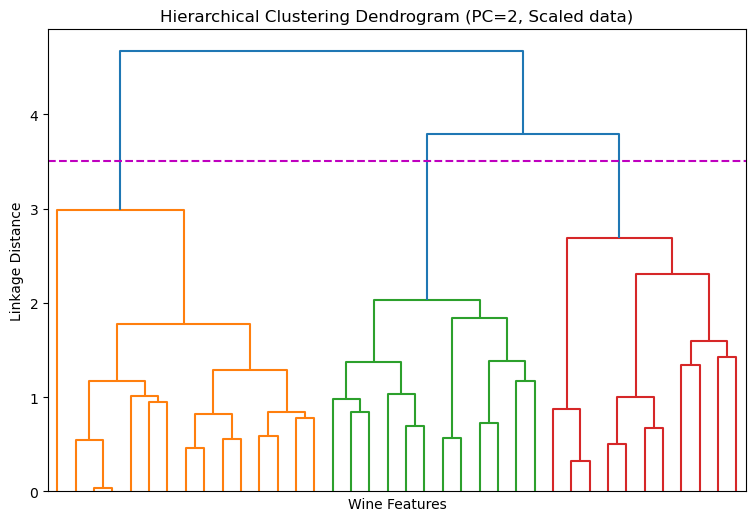

In [37]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2) 
X_scaled_pca = pca.fit_transform(X_scaled)

# Generate the linkage matrix
Z = linkage(X_scaled_pca, method='average')

# Plot the dendrogram
plt.figure(figsize=(9, 6))
dendrogram(Z,p=5,truncate_mode='level', no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (PC=2, Scaled data)")
plt.xlabel('Wine Features')
plt.ylabel('Linkage Distance')
plt.axhline(y=3.5, color='m', linestyle='--')
plt.show()

### Results:
### By cutting the Linkage Distance at 3.5 (no horizontal lines cutting through the longest vertical line), it comes out with a very distinct 3 clusters - the best clustering.
### This is also confirm the 3 different cultivars of the orignal wine dataset.

### 5.2 Evaluate the clustering quality of Hierarchical clustering

In [38]:
# Apply PCA (n_components=2)
pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

# Perform Hierarchical Clustering
Z = linkage(X_scaled_pca, method='ward')
labels = fcluster(Z, t=3.5, criterion='distance') 

# Compute Silhouette Score
score = silhouette_score(X_scaled_pca, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.3815935643688214


### This score of 0.3816 suggests that:
### -Clusters exist but are moderately well-defined.
### -Some overlap or noise may be present.
### -Not a perfect separation, but better than random assignment.

## 6. Conclusions

### DBSCAN achieved the highest silhouette score (0.57) compared to K-Means (0.56) and Hierarchical Clustering (0.38). A higher silhouette score indicates that the clustering results in better-defined and more distinct clusters with less overlap.
### DBSCAN can identify outliers or noise points (labeled as -1), which is an advantage over K-Means and Hierarchical Clustering. In DBSCAN, points that don’t fit into any cluster are treated as noise, which helps in achieving more meaningful clusters.
### K-Means forces every point into a cluster, including noise points, which can dilute cluster quality.
### Hierarchical clustering also struggles with outliers, which might be one of the reasons for its relatively low silhouette score.
### DBSCAN doesn’t assume that clusters are spherical or have a fixed size, making it flexible and capable of detecting clusters of arbitrary shapes, unlike K-Means.
### K-Means, on the other hand, assumes clusters are spherical and of equal size, which may not be a good fit for certain datasets.
### While DBSCAN requires careful selection of eps and min_samples, the model is generally robust to minor changes in these parameters and can adapt to a variety of cluster shapes and densities.
### Verdict: 
### DBSCAN is the best clustering model for this wine dataset based on its ability to handle noise, detect non-spherical clusters, and achieve the highest silhouette score. However, if the goal is interpretability and structured clusters, K-Means (0.56) is still a good alternative.


### 6.1 General guidelines on Silhouette Score :
### Score ≥ 0.5: Good clustering. The clusters are fairly well-defined and separated, and the points are more likely to be in the correct clusters.
### 0.25 ≤ Score < 0.5: Fair clustering. The clusters have some degree of separation, but there may be some overlap or ambiguity in assignments.
### Score < 0.25: Poor clustering. The clusters are not well-defined, and points likely belong to more than one cluster, need to reconsider the number of clusters or the clustering algorithm used.